In [51]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
# load .mat data with expected structure
# in_file = '/home/filip/ramAIn/datasets/dataset - pro statistické vyhodnocení/Vac 3 - 1/Scan_049_Spec.Data 1_F.mat'
in_file = "/home/filip/ramAIn/data/Cryptomonas.mat"
mdict = {}
matlab_data = scipy.io.loadmat(in_file, mdict=mdict)

name = list(mdict)[-1]
matlab_data = matlab_data[name][0, 0]

data = matlab_data[7]

map_shape = tuple(matlab_data[5][0])

x_axis = matlab_data[9][1][0][0]
data = np.reshape(data, (map_shape[1], map_shape[0], -1))
print(data.shape)

(50, 50, 1600)


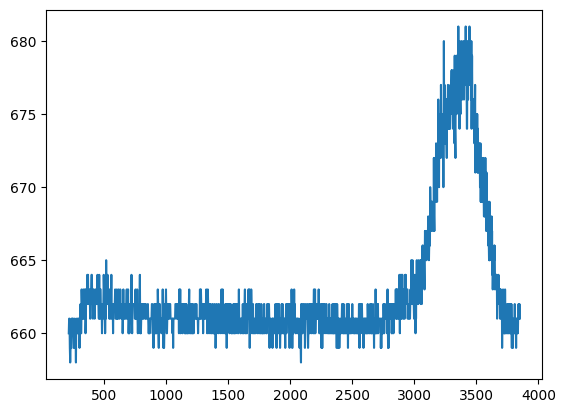

In [52]:
plt.plot(x_axis, data[0,0, :])
plt.show()

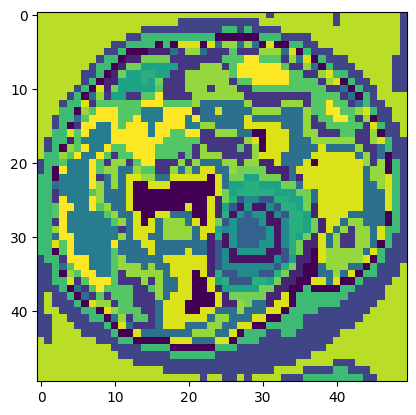

[674.90594 766.5797  682.8432  691.7836  665.96924 724.45294 810.9727
 683.6843  703.6932  744.8669  790.1765  697.5454  708.9292  669.2607
 695.71484 690.12006 687.74774 662.7859  679.6976  699.72504]
17


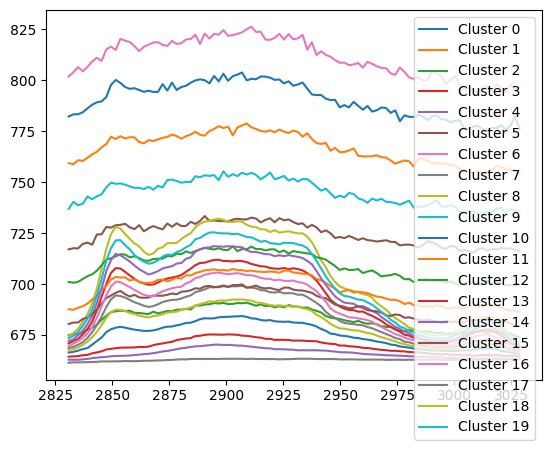

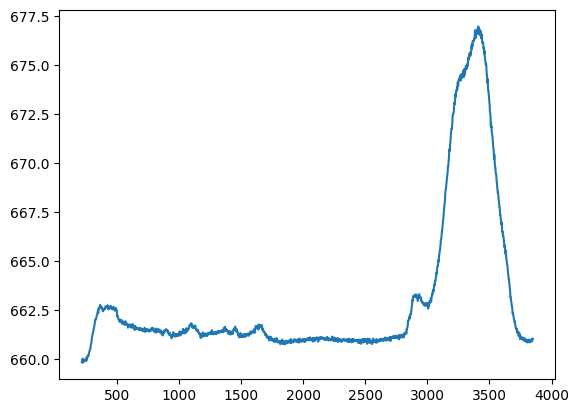

In [53]:
from sklearn.cluster import KMeans
N = 20

cluster_data = data.reshape(-1, data.shape[-1])
c_h_band = (x_axis > 2830) & (x_axis < 3030)
cluster_data = cluster_data[:, c_h_band] # just band of C-H vibrations
kmeans = KMeans(n_clusters=N, random_state=0).fit(cluster_data)
water_map = kmeans.labels_.reshape(map_shape[1], map_shape[0])
plt.imshow(water_map)
plt.show()

# create array of cluster data divided by cluster label - so label 0 are on row 0, label 1 on row 1 etc.
cluster_data = np.array([cluster_data[kmeans.labels_ == i].mean(axis=0) for i in range(N)])

means = np.mean(cluster_data, axis=1)
print(means)
id_lowest = np.argmin(means)
print(id_lowest)
# calculate mean of each cluster
plt.plot(x_axis[c_h_band], cluster_data.T, label=[f'Cluster {i}' for i in range(N)])
plt.legend()
plt.show()

# get indices of spectra in cluster woth lowest mean
idx_lowest = np.where(kmeans.labels_ == id_lowest)[0]
water_candidates = data.reshape(-1, data.shape[-1])[idx_lowest]
mean_water = water_candidates.mean(axis=0)
plt.plot(x_axis, mean_water)
plt.show()

# for i in range(N):
#     idx = np.where(kmeans.labels_ == i)[0]
#     water_candidates = data.reshape(-1, data.shape[-1])[idx]
#     mean_water = water_candidates.mean(axis=0)
#     plt.plot(x_axis, mean_water)
#     plt.show()
